## Homework from Team 2 (Dynamic Programming)##

** Authors: Zhangjie LV, Kaisheng LIAN, Liling HUANG, Shurui LIU, Yuhong ZHU **

** Date: Jan 31st 2018 **

### Exercises 2

500


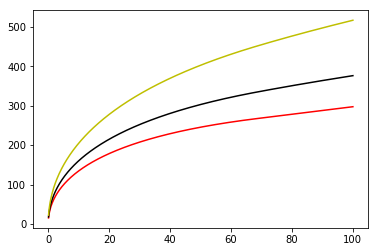

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

β = 0.95 
num_points = 1000 
tol = 1e-10
θ, δ = 0.5, 0.1
shock_matrix = np.array([[0.9,0.05,0.05],[0.15,0.7,0.15],[0.1,0.1,0.8]])
z_l, z_m, z_h = 1, 2, 7

w_vec = np.reshape(np.linspace(0.1,100,num_points),num_points) 
wprime = w_vec-0.005 
value_old_l = np.ones(num_points)
value_old_h = np.ones(num_points)
value_old_m = np.ones(num_points)
value_new_l = np.zeros(num_points)
value_new_h = np.zeros(num_points)
value_new_m = np.zeros(num_points)

ctr = 0

while(np.max(np.abs(value_old_l-value_new_l)) > tol) and (np.max(np.abs(value_old_m-value_new_m)) > tol) and (np.max(np.abs(value_old_h-value_new_h)) > tol) and ctr<1000: 
    np.copyto(value_old_l, value_new_l)
    np.copyto(value_old_m, value_new_m)
    np.copyto(value_old_h, value_new_h)
    
    for ii in np.arange(num_points): 
        
        value_new_l[ii] = np.max(z_l*w_vec[ii]**θ+(1-δ)*w_vec[ii]-wprime[wprime<=w_vec[ii]]+ β*(shock_matrix[0,0]*value_old_l[wprime<=w_vec[ii]] + \
        shock_matrix[0,1]*value_old_m[wprime<=w_vec[ii]]+shock_matrix[0,2]*value_old_h[wprime<=w_vec[ii]]))
        value_new_m[ii] = np.max(z_m*w_vec[ii]**θ+(1-δ)*w_vec[ii]-wprime[wprime<=w_vec[ii]]+ β*(shock_matrix[1,0]*value_old_l[wprime<=w_vec[ii]] + \
        shock_matrix[1,1]*value_old_m[wprime<=w_vec[ii]]+shock_matrix[1,2]*value_old_h[wprime<=w_vec[ii]]))
        value_new_h[ii] = np.max(z_h*w_vec[ii]**θ+(1-δ)*w_vec[ii]-wprime[wprime<=w_vec[ii]]+ β*(shock_matrix[2,0]*value_old_l[wprime<=w_vec[ii]] + \
        shock_matrix[2,1]*value_old_m[wprime<=w_vec[ii]]+shock_matrix[2,2]*value_old_h[wprime<=w_vec[ii]]))
        
    ctr = ctr+1 

print(ctr) 
plt.plot(w_vec, value_new_l,'r-',w_vec,value_new_m,'k-',w_vec,value_new_h,'y-')
plt.show()